In [1]:
import os
import sunpy.map
import matplotlib
import numpy as np
import pandas as pd
import plotly.io as pio
from datetime import datetime
from matplotlib import colormaps, pyplot as plt

import prepare_data
import detect
import plot_detection
from settings import *

pio.renderers.default = 'vscode'
%matplotlib inline

# Data Inspection

## Prepare Data

Extract Data from File System

In [2]:
# Extract He I observation datetimes from FITS files
HE_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
)

# Extract magnetogram datetimes from 6302l FITS files
MAG_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_MAG_DIR, SELECT_MAG_DIR
)

# Extract EUV datetimes from FITS files
EUV_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_EUV_DIR, SELECT_EUV_DIR
)

# Extract NSO pre-processed EQW arrays from NSO FITS files
NSO_EQW_DICT = prepare_data.extract_nso_eqw(NSO_SINGLE_DIR)
NSO_EQW_DATE_LIST = list(NSO_EQW_DICT.keys())
NSO_EQW_DATE_LIST.sort()

# Extract NSO estimated CH Carrington maps from NSO FITS files
CH_MAP_DICT = prepare_data.extract_nso_ch_maps(NSO_MERGED_DIR)
CH_MAP_LIST = list(CH_MAP_DICT.keys())
CH_MAP_LIST.sort()

num_maps = len(HE_DATE_LIST)
date_strs = [HE_DATE_LIST[0], HE_DATE_LIST[-1]]
file_date_str = f'{date_strs[0]}_{date_strs[-1]}'
datetimes = [datetime.strptime(date_str, DICT_DATE_STR_FORMAT)
             for date_str in date_strs]
title_date_strs = [datetime.strftime(d, '%m/%d/%Y') for d in datetimes]

Rename Data

In [66]:
# Delete all gzipped files after renaming
remove_gzip = True

# Rename all He FITS files to include observation date in title
prepare_data.rename_dir(ALL_HE_DIR, remove_gzip)

# Rename all magnetogram FITS files to include observation date in title
prepare_data.rename_dir(ALL_MAG_DIR, remove_gzip)

# Rename all EUV FITS files to include observation date in title
prepare_data.rename_dir(ALL_EUV_DIR, remove_gzip)

## EUV Download

Automatic

In [ ]:
from datetime import datetime, timedelta
DICT_DATE_STR_FORMAT = '%Y_%m_%d__%H_%M'

# Dates for which to download EUV observations
download_euv_dates = HE_DATE_LIST

# Identify missing dates
available_datetimes = [datetime.strptime(date_str, DICT_DATE_STR_FORMAT).date()
                       for date_str in HE_DATE_LIST]
days_in_period = (available_datetimes[-1] - available_datetimes[0]).days
all_period_dates = set(available_datetimes[0] + timedelta(num_days)
                       for num_days in range(days_in_period))
missing_dates = all_period_dates - set(available_datetimes)

# Missing datetime strings shifted to noon
missing_date_str_list = [
    datetime.strftime(missing_date, DICT_DATE_STR_FORMAT)
    for missing_date in missing_dates
]
missing_date_str_list = [
    missing_date_str[:12] + '16_00'
    for missing_date_str in missing_date_str_list
]

# Add missing datetimes
download_euv_dates.extend(missing_date_str_list)
download_euv_dates.sort()

In [ ]:
download_euv_dates = download_euv_dates[97:98]

In [ ]:
prepare_data.download_euv(download_euv_dates, EUV_DATE_LIST,
                          download_dir=ALL_EUV_DIR, hr_window=3)

Manual

In [ ]:
import astropy.units as u
from datetime import datetime, timedelta
from sunpy.net import Fido, attrs as a


date_str = '2012_05_12__18_28'
hr_window = 1

center_date = datetime.strptime(date_str, DICT_DATE_STR_FORMAT)
        
min_date = center_date - timedelta(hours=hr_window)
max_date = center_date + timedelta(hours=hr_window)

result = Fido.search(
    a.Time(min_date, max_date),
    a.Instrument.aia, a.Wavelength(193*u.angstrom),
    a.Sample(30*u.minute), 
)
result

In [ ]:
row_num = 2
download_dir = ALL_EUV_DIR

Fido.fetch(result[:, row_num], path=download_dir + '{file}')

## Available Data

In [3]:
print('Available Datetimes for He I Observations:')
prepare_data.display_dates(HE_DATE_LIST)

Available Datetimes for He I Observations:
2012_04_01__17_03 	2012_04_02__17_26 	2012_04_03__17_19 	2012_04_03__21_37 	
2012_04_04__17_40 	2012_04_05__18_10 	2012_04_06__17_23 	2012_04_08__18_13 	
2012_04_09__21_57 	2012_04_10__19_30 	2012_04_12__21_15 	2012_04_13__18_07 	
2012_04_15__20_01 	2012_04_16__17_07 	2012_04_17__17_41 	2012_04_18__17_07 	
2012_04_19__17_56 	2012_04_20__19_13 	2012_04_21__21_04 	2012_04_22__18_07 	
2012_04_23__18_25 	2012_04_24__18_58 	2012_04_27__18_28 	2012_04_28__19_07 	
2012_04_28__20_49 	2012_04_29__18_40 	2012_04_30__18_38 	2012_05_01__18_08 	
2012_05_02__17_35 	2012_05_03__18_02 	2012_05_04__17_13 	2012_05_05__19_35 	
2012_05_06__18_33 	2012_05_07__17_59 	2012_05_08__16_52 	2012_05_10__17_14 	
2012_05_11__18_01 	2012_05_12__18_28 	2012_05_13__17_52 	2012_05_14__18_42 	
2012_05_15__17_39 	2012_05_16__17_11 	2012_05_17__18_55 	2012_05_18__20_02 	
2012_05_19__18_52 	2012_05_20__18_49 	2012_05_21__19_03 	2012_05_22__18_04 	
2012_05_26__19_57 	2012_05_27__19

In [ ]:
print('Available Datetimes for Magnetograms:')
prepare_data.display_dates(MAG_DATE_LIST)

In [ ]:
print('Available Datetimes for EUV Observations:')
prepare_data.display_dates(EUV_DATE_LIST)

In [ ]:
print('Available Datetimes for NSO Pre-Processed He I Observations:')
prepare_data.display_dates(NSO_EQW_DATE_LIST)

In [ ]:
print('Available Carrington Rotation for NSO Coronal Hole Maps:')
prepare_data.display_crs(CH_MAP_LIST)

# Magnetogram & EUV Comparison

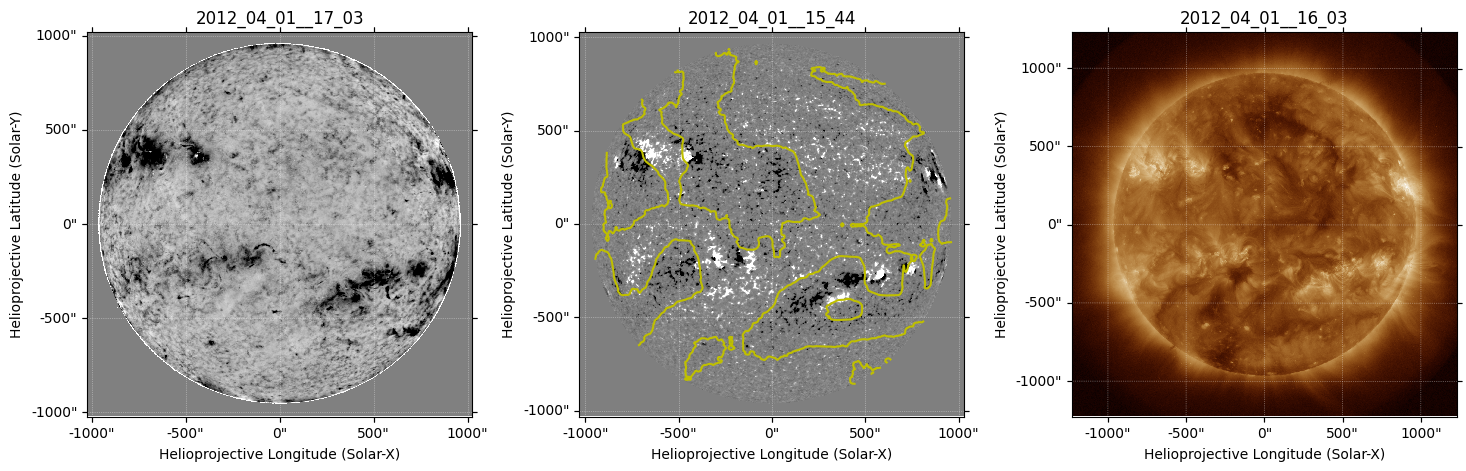

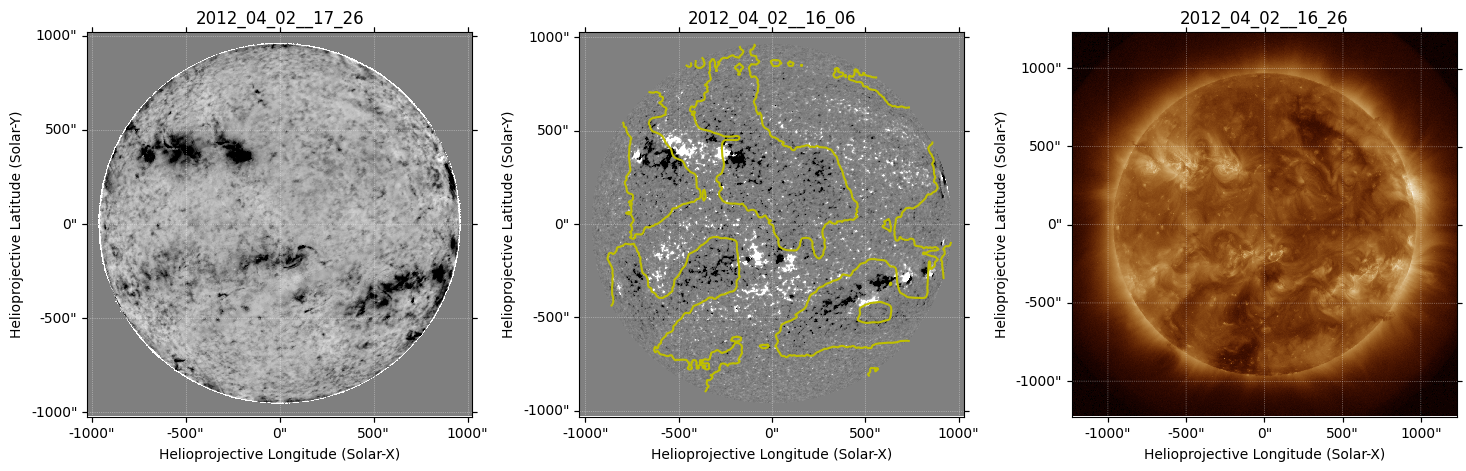

In [4]:
smooth_size_percent = 10

for he_date_str in HE_DATE_LIST[:2]:

    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    euv_date_str = prepare_data.get_nearest_date_str(
        date_str_list=EUV_DATE_LIST, selected_date_str=he_date_str
    )

    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    )
    mag_fits_file = prepare_data.get_fits_path(
        mag_date_str, DATE_RANGE, ALL_MAG_DIR, SELECT_MAG_DIR
    )
    euv_fits_file = prepare_data.get_fits_path(
        euv_date_str, DATE_RANGE, ALL_EUV_DIR, SELECT_EUV_DIR
    )
    he_map = prepare_data.get_solis_sunpy_map(he_fits_file)
    mag_map = prepare_data.get_solis_sunpy_map(mag_fits_file)
    euv_map = sunpy.map.Map(euv_fits_file)

    # Process magnetogram
    smoothed_mag_map = prepare_data.get_smoothed_map(mag_map, smooth_size_percent)

    fig = plt.figure(figsize=(18, 5))

    ax = fig.add_subplot(131, projection=he_map)
    he_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)

    ax = fig.add_subplot(132, projection=mag_map)
    mag_map.plot(axes=ax, vmin=-50, vmax=50, title=mag_date_str)
    plot_detection.plot_map_contours(ax, smoothed_mag_map)
    
    ax = fig.add_subplot(133, projection=euv_map)
    euv_map.plot(axes=ax, title=euv_date_str)

# Data Products

## Save Files

### Reprojected Magnetograms

Differential rotation

In [ ]:
overwrite = True
smooth_size_percent = 10

if not os.path.isdir(REPROJECT_MAG_SAVE_DIR):
    os.makedirs(REPROJECT_MAG_SAVE_DIR)

for he_date_str in HE_DATE_LIST[1:]:

    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    fits_file_name = f'{REPROJECT_MAG_SAVE_DIR}Mag{mag_date_str}_He{he_date_str}'
    reprojected_fits_file = f'{fits_file_name}.fits'
    reprojected_smooth_fits_file = f'{fits_file_name}_smooth.fits'
    
    # Optionally overwrite existing files
    if os.path.isfile(reprojected_fits_file):
        if overwrite:
            os.remove(reprojected_fits_file)
        else:
            print((f'{mag_date_str} magnetogram reprojected '
                   + f'to {he_date_str} already exists.'))
            continue
    
    if os.path.isfile(reprojected_smooth_fits_file):
        if overwrite:
            os.remove(reprojected_smooth_fits_file)
        else:
            print((f'{mag_date_str} magnetogram reprojected '
                   + f'to {he_date_str} already exists.'))
            continue
    
    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    # Extract Magnetogram observation
    mag_map = prepare_data.get_solis_sunpy_map(ALL_MAG_DIR + mag_date_str + '.fts')

    # Process magnetogram
    smoothed_map = prepare_data.get_smoothed_map(mag_map, smooth_size_percent)
    reprojected_mag_map = prepare_data.diff_rotate(
        input_map=mag_map, target_map=he_map
    )
    reprojected_smooth_map = prepare_data.diff_rotate(
        input_map=smoothed_map, target_map=he_map
    )
    
    # Save to FITS files
    reprojected_mag_map.save(reprojected_fits_file)
    reprojected_smooth_map.save(f'{fits_file_name}_smooth.fits')
    print(f'{mag_date_str} magnetogram reprojected to {he_date_str} maps saved.')

Heliographic reprojection

In [3]:
overwrite = True

if not os.path.isdir(REPROJECT_MAG_SAVE_DIR):
    os.makedirs(REPROJECT_MAG_SAVE_DIR)

for he_date_str in HE_DATE_LIST:

    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Optionally overwrite existing files
    reprojected_fits_file = (f'{REPROJECT_MAG_SAVE_DIR}Mag{mag_date_str}'
                             f'_He{he_date_str}.fits')
    if os.path.isfile(reprojected_fits_file):
        if overwrite:
            os.remove(reprojected_fits_file)
        else:
            print((f'{mag_date_str} magnetogram reprojected '
                   + f'to {he_date_str} already exists.'))
            continue
    
    # Extract observations
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.fits')
    pre_processed_map = sunpy.map.Map(pre_process_file)
    
    mag_fits_file = prepare_data.get_fits_path(
        mag_date_str, DATE_RANGE, ALL_MAG_DIR, SELECT_MAG_DIR
    )
    mag_map = prepare_data.get_solis_sunpy_map(mag_fits_file)

    # Process magnetogram
    hg_mag_map = detect.reproject_to_cea(mag_map)
    reprojected_mag_map = hg_mag_map.reproject_to(
        pre_processed_map.wcs, algorithm='adaptive'
    )
    
    # Save to FITS files
    reprojected_mag_map.save(reprojected_fits_file, overwrite=overwrite)
    print(f'{mag_date_str} magnetogram reprojected to {he_date_str} map saved.')

2013_02_16__15_47 magnetogram reprojected to 2013_02_16__18_23 map saved.
2013_06_19__14_30 magnetogram reprojected to 2013_06_19__15_35 map saved.
2015_02_27__17_52 magnetogram reprojected to 2015_02_27__20_39 map saved.
2015_03_29__17_06 magnetogram reprojected to 2015_03_29__18_00 map saved.
2015_03_31__15_49 magnetogram reprojected to 2015_03_31__18_13 map saved.
2015_04_28__16_20 magnetogram reprojected to 2015_04_28__17_25 map saved.
2015_06_19__15_09 magnetogram reprojected to 2015_06_19__16_33 map saved.
2015_07_16__14_58 magnetogram reprojected to 2015_07_16__17_12 map saved.


### Create He/EUV Ratios

In [3]:
overwrite = False


if not os.path.isdir(RATIO_SAVE_DIR):
    os.makedirs(RATIO_SAVE_DIR)

for he_date_str in HE_DATE_LIST:

    euv_date_str = prepare_data.get_nearest_date_str(
        EUV_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Optionally overwrite existing files
    ratio_fits_file = f'{RATIO_SAVE_DIR}He{he_date_str}_EUV{euv_date_str}.fits'
    if os.path.isfile(ratio_fits_file):
        if overwrite:
            os.remove(ratio_fits_file)
        else:
            print((f'{he_date_str} to {euv_date_str} ratio already exists.'))
            continue
    
    # Extract He I observation
    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    )
    he_map = prepare_data.get_solis_sunpy_map(he_fits_file)
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    # Remove error causing keywords which have invalid ascii content
    he_map.meta.pop('history')
    he_map.meta.pop('comment')
    
    # Extract and reproject EUV observation
    euv_fits_file = prepare_data.get_fits_path(
        euv_date_str, DATE_RANGE, ALL_EUV_DIR, SELECT_EUV_DIR
    )
    euv_map = sunpy.map.Map(euv_fits_file)
    reprojected_euv_map = prepare_data.diff_rotate(
        input_map=euv_map, target_map=he_map
    )
    
    # Pre-process He I data via background removal and upper cutoff
    he_map_data = np.where(he_map.data == he_map.data[0,0],
                           np.nan, he_map.data)
    he_map_data = np.where(he_map_data >= np.percentile(he_map_data, 99.9),
                           np.nan, he_map_data)
    
    ratio_data = np.divide(he_map_data, (reprojected_euv_map.data)**0.5)
    ratio_map = sunpy.map.Map(ratio_data, he_map.meta)
    
    # Save to FITS files
    ratio_map.save(ratio_fits_file)
    print(f'He{he_date_str} to EUV{euv_date_str} ratio saved.')

He2013_02_16__18_23 to EUV2013_02_16__17_23 ratio saved.
He2013_06_19__15_35 to EUV2013_06_19__14_35 ratio saved.
He2015_02_27__20_39 to EUV2015_02_27__19_39 ratio saved.
He2015_03_29__18_00 to EUV2015_03_29__17_00 ratio saved.
He2015_03_31__18_13 to EUV2015_03_31__17_13 ratio saved.
He2015_04_28__17_25 to EUV2015_04_28__16_25 ratio saved.
He2015_06_19__16_33 to EUV2015_06_19__15_33 ratio saved.
He2015_07_16__17_12 to EUV2015_07_16__16_12 ratio saved.


## Save Media

### Ensemble Map Comparison

#### Magnetogram & EUV

In [ ]:
overwrite = True
out_dir = DETECTION_IMAGE_DIR + 'Full_Comparison/'
smooth_size_percent = 10

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for euv_date_str in EUV_DATE_LIST:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}EUV{euv_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'EUV {euv_date_str} full comparison already exists.'))
        continue

    he_date_str = prepare_data.get_latest_date_str(
        HE_DATE_LIST, selected_date_str=euv_date_str
    )
    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    mag_map = prepare_data.get_solis_sunpy_map(ALL_MAG_DIR + mag_date_str + '.fts')
    euv_map = sunpy.map.Map(ALL_EUV_DIR + euv_date_str + '.fts')

    # Process magnetogram
    smoothed_mag_map = prepare_data.get_smoothed_map(mag_map, smooth_size_percent)
    
    # Extract saved ensemble map array and convert to Sunpy map
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map_data = np.load(ensemble_file, allow_pickle=True)[-1]
    ensemble_map = sunpy.map.Map(np.flipud(ensemble_map_data), he_map.meta)
    ensemble_map.plot_settings['cmap'] = matplotlib.colormaps['magma']
    
    fig = plt.figure(figsize=(24, 5))

    ax = fig.add_subplot(141, projection=he_map)
    he_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)

    ax = fig.add_subplot(142, projection=he_map)
    ensemble_map.plot(axes=ax, title='')
    
    ax = fig.add_subplot(143, projection=mag_map)
    mag_map.plot(axes=ax, vmin=-50, vmax=50, title=mag_date_str)
    plot_detection.plot_map_contours(ax, smoothed_mag_map)
    
    ax = fig.add_subplot(144, projection=euv_map)
    euv_map.plot(axes=ax, title=euv_date_str)
    
    plt.savefig(comparison_img_file)
    plt.close(fig)

    print(f'{euv_date_str} map comparison saved.')

#### Magnetic Neutral Lines

In [ ]:
out_dir = DETECTION_IMAGE_DIR + 'Mag_Comparison/'

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for he_date_str in HE_DATE_LIST[-10:]:

    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )

    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue

    # Extract saved processed magnetograms
    mag_fits_name = f'{REPROJECT_MAG_SAVE_DIR}Mag{mag_date_str}_He{he_date_str}'
    reprojected_fits_file = f'{mag_fits_name}.fits'
    reprojected_smooth_fits_file = f'{mag_fits_name}_smooth.fits'
    reprojected_mag_map = sunpy.map.Map(reprojected_fits_file)
    reprojected_smooth_map = sunpy.map.Map(reprojected_smooth_fits_file)
    # reprojected_smooth_map = sunpy.map.Map(np.fliplr(reprojected_smooth_map.data), reprojected_smooth_map.meta)

    # Extract saved ensemble map array and convert to Sunpy map
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map_data = np.load(ensemble_file, allow_pickle=True)[-1]
    ensemble_map = sunpy.map.Map(np.flipud(ensemble_map_data), he_map.meta)
    ensemble_map.plot_settings['cmap'] = matplotlib.colormaps['magma']

    fig = plt.figure(figsize=(18, 5))

    ax = fig.add_subplot(131, projection=he_map)
    he_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)

    ax = fig.add_subplot(132, projection=he_map)
    ensemble_map.plot(axes=ax, title='')
    plot_detection.plot_map_contours(ax, reprojected_smooth_map)

    ax = fig.add_subplot(133, projection=he_map)
    reprojected_mag_map.plot(axes=ax, vmin=-50, vmax=50, title=mag_date_str)
    plot_detection.plot_map_contours(ax, reprojected_smooth_map)

    plt.savefig(f'{out_dir}He{he_date_str}.jpg')
    plt.close(fig)

    print(f'{he_date_str} map comparison saved')

#### Magnetic Neutral Lines & EUV 

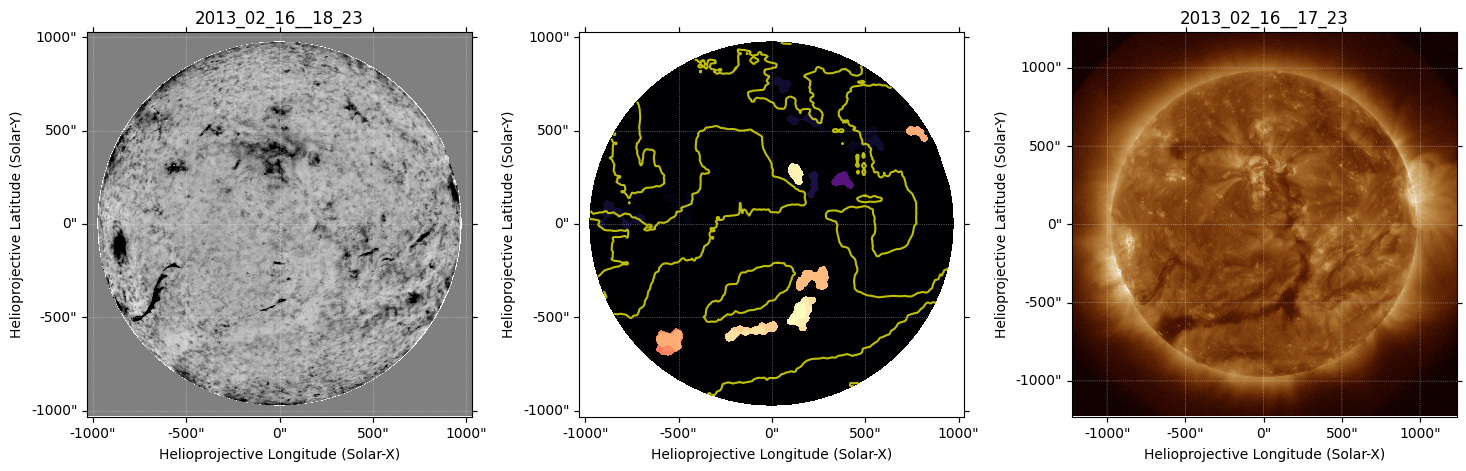

In [4]:
overwrite = True
out_dir = DETECTION_IMAGE_DIR + 'EUV_Comparison/'

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for euv_date_str in EUV_DATE_LIST[:1]:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}EUV{euv_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'EUV {euv_date_str} comparison already exists.'))
        continue
    
    he_date_str = prepare_data.get_latest_date_str(
        HE_DATE_LIST, selected_date_str=euv_date_str
    )
    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    fig = plt.figure(figsize=(18, 5))
    plot_detection.plot_he_neutral_lines_euv_comparison(
        fig, he_date_str, mag_date_str, euv_date_str
    )
    
    # Save plot
    plt.savefig(comparison_img_file)
    plt.close(fig)
    print(f'{euv_date_str} map comparison saved.')

Version Comparison

In [9]:
overwrite = True
out_dir = DETECTION_IMAGE_DIR + 'v0_1_Comparison/'

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

old_version_dir = DETECT_DIR + 'v0_1/' + 'Saved_Map_Files/'

for euv_date_str in EUV_DATE_LIST:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}EUV{euv_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'EUV {euv_date_str} comparison already exists.'))
        continue
    
    he_date_str = prepare_data.get_latest_date_str(
        HE_DATE_LIST, selected_date_str=euv_date_str
    )
    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
    
    # Extract saved ensemble map array and convert to Sunpy map
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map_data = np.load(ensemble_file, allow_pickle=True)[-1]
    ensemble_map = sunpy.map.Map(np.flipud(ensemble_map_data), he_map.meta)
    ensemble_map.plot_settings['cmap'] = colormaps['magma']

    # Extract old saved ensemble map array and convert to Sunpy map
    old_file = f'{old_version_dir}{he_date_str}_ensemble_map.npy'
    old_map_data = np.load(old_file, allow_pickle=True)[-1]
    old_map_data = np.where(np.isnan(ensemble_map_data), np.nan, old_map_data)
    old_map = sunpy.map.Map(np.flipud(old_map_data), he_map.meta)
    old_map.plot_settings['cmap'] = colormaps['magma']
    
    # Extract saved processed magnetogram
    reprojected_smooth_file = (f'{REPROJECT_MAG_SAVE_DIR}Mag{mag_date_str}'
                               + f'_He{he_date_str}_smooth.fits')
    reprojected_smooth_map = sunpy.map.Map(reprojected_smooth_file)
    
    euv_map = sunpy.map.Map(ALL_EUV_DIR + euv_date_str + '.fts')
    
    fig = plt.figure(figsize=(12, 11))
    
    # Plot He observation
    ax = fig.add_subplot(2, 2, 1, projection=he_map)
    he_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)
    
    # Plot EUV observation
    ax = fig.add_subplot(2, 2, 2, projection=euv_map)
    euv_map.plot(axes=ax, title=euv_date_str)
    
    # Plot ensemble map with overlayed neutral lines
    ax = fig.add_subplot(2, 2, 3, projection=he_map)
    old_map.plot(axes=ax, title='v0.1')
    plot_detection.plot_map_contours(ax, reprojected_smooth_map)
    
    # Plot ensemble map with overlayed neutral lines
    ax = fig.add_subplot(2, 2, 4, projection=he_map)
    ensemble_map.plot(axes=ax, title='v0.5')
    plot_detection.plot_map_contours(ax, reprojected_smooth_map)

    # Save plot
    plt.savefig(comparison_img_file)
    plt.close(fig)
    print(f'{euv_date_str} map comparison saved.')

2012_06_01__16_15 map comparison saved.
2012_06_02__20_21 map comparison saved.
2012_06_03__13_00 map comparison saved.
2012_06_04__16_18 map comparison saved.
2012_06_05__16_16 map comparison saved.
2012_06_06__18_11 map comparison saved.
2012_06_07__17_10 map comparison saved.
2012_06_08__18_51 map comparison saved.
2012_06_09__18_20 map comparison saved.
2012_06_10__16_44 map comparison saved.
2012_06_11__17_01 map comparison saved.
2012_06_12__15_59 map comparison saved.
2012_06_13__16_20 map comparison saved.
2012_06_14__16_41 map comparison saved.
2012_06_15__16_01 map comparison saved.
2012_06_16__18_29 map comparison saved.
2012_06_17__17_07 map comparison saved.
2012_06_18__16_16 map comparison saved.
2012_06_19__16_56 map comparison saved.
2012_06_20__17_06 map comparison saved.
2012_06_21__17_53 map comparison saved.
2012_06_22__17_13 map comparison saved.
2012_06_23__17_34 map comparison saved.
2012_06_24__13_00 map comparison saved.
2012_06_25__15_50 map comparison saved.


### Ratio Map Comparison

In [4]:
overwrite = False
out_dir = OUTPUT_DIR + 'Ratio_Comparison/' + DATE_DIR

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}He{he_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'He {he_date_str} ratio comparison already exists.'))
        continue

    euv_date_str = prepare_data.get_nearest_date_str(
        EUV_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Extract observations and ratio map
    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    )
    he_map = prepare_data.get_solis_sunpy_map(he_fits_file)
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    euv_fits_file = prepare_data.get_fits_path(
        euv_date_str, DATE_RANGE, ALL_EUV_DIR, SELECT_EUV_DIR
    )
    euv_map = sunpy.map.Map(euv_fits_file)
    
    ratio_fits_file = f'{RATIO_SAVE_DIR}He{he_date_str}_EUV{euv_date_str}.fits'
    ratio_map = sunpy.map.Map(ratio_fits_file)
    
    # Create panel plot
    fig = plt.figure(figsize=(18, 5))

    ax = fig.add_subplot(131, projection=he_map)
    he_map.plot(axes=ax, title=he_date_str, vmin=-100, vmax=100)

    ax = fig.add_subplot(132, projection=euv_map)
    euv_map.plot(axes=ax, title=euv_date_str)

    ax = fig.add_subplot(133, projection=he_map)
    ratio_map.plot(axes=ax, cmap='jet', vmin=-1, vmax=6)
    
    # Save plot
    plt.savefig(comparison_img_file)
    plt.close(fig)
    print(f'He {he_date_str} map comparison saved.')

He 2013_02_16__18_23 map comparison saved.
He 2013_06_19__15_35 map comparison saved.
He 2015_02_27__20_39 map comparison saved.
He 2015_03_29__18_00 map comparison saved.
He 2015_03_31__18_13 map comparison saved.
He 2015_04_28__17_25 map comparison saved.
He 2015_06_19__16_33 map comparison saved.
He 2015_07_16__17_12 map comparison saved.


### Time Series Outcomes

Single Mask vs Time

In [3]:
from matplotlib import colormaps


def get_outcome_series(he_date_str_list, he_dir, DETECTION_SAVE_DIR):
    """Retrieve series with single mask outcomes over time.
    
    Args
        he_date_str_list: list of date strings for ensemble maps
        he_dir: path to directory with saved He I observations
        DETECTION_SAVE_DIR: path to directory with saved single masks
    Returns
        Dataframes of outcomes by confidence level over time.
    """
    # List for outcomes at varied confidence levels and datetimes
    num_ch_list = []
    area_percent_list = []
    area_list = []
    px_percent_list = []

    for he_date_str in he_date_str_list:
        
        he_file = f'{he_dir}{he_date_str}.fts'
        he_map = prepare_data.get_solis_sunpy_map(he_file)
        if not he_map:
            print(f'{he_date_str} He I observation extraction failed.')
            continue
        
        # Extract saved single mask
        mask_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ch_mask.npy'
        mask_data = np.load(mask_file, allow_pickle=True)[-1]
        mask_map = sunpy.map.Map(np.flipud(mask_data), he_map.meta)
        
        # Lists of CH outcomes
        num_ch_list.append(detect.get_num_ch(mask_data))
        area_tuple = detect.get_open_area(mask_map, confidence_level=0)
        area_percent_list.append(area_tuple[0])
        area_list.append(area_tuple[1])
        px_percent_list.append(detect.get_px_percent(mask_data))
    
    # Convert to dataframes
    datetime_list = [datetime.strptime(he_date_str, DICT_DATE_STR_FORMAT)
                    for he_date_str in he_date_str_list]
    num_ch_series = pd.Series(
        num_ch_list, index=datetime_list
    )
    area_percent_series = pd.Series(
        area_percent_list, index=datetime_list
    )
    area_series = pd.Series(
        area_list, index=datetime_list
    )
    px_percent_series = pd.Series(
        px_percent_list, index=datetime_list
    )
    return num_ch_series, area_percent_series, area_series, px_percent_series


def plot_outcome_vs_time(ax, outcome_series, date_str, cmap, ylabel):
    """Plot outcome stacked plot vs time for ensemble maps.
    
    Args
        ax: matplotlib axes object to plot on
        outcome_series: Pandas dataframe of outcome by confidence level
            over time
        date_str: Date string at which to plot a vertical line
        cmap: Matplotlib colormap name
        ylabel: string for y axis label
    """
    datetimes = outcome_series.index
    ax.fill_between(datetimes, outcome_series, 0, color=colormaps[cmap](0.75))
    
    # Vertical line for datetime indicator
    vline_datetime = datetime.strptime(date_str, DICT_DATE_STR_FORMAT)
    max_outcome = outcome_series.max()
    ax.vlines(x=[vline_datetime, vline_datetime], ymax=1.2*max_outcome, ymin=0,
              colors='k', linestyles='dashed')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylabel(ylabel)
    ax.set_xlim([datetimes[0], datetimes[-1]])
    ax.set_ylim([0, 1.1*max_outcome])

In [ ]:
num_ch_series, area_percent_series, area_series, px_percent_series = get_outcome_series(
    HE_DATE_LIST, ALL_HE_DIR, DETECTION_SAVE_DIR
)

In [39]:
overwrite = True
region_num_settings = (
    DETECTION_IMAGE_DIR + 'Single_Region_Number/',
    num_ch_series, 'viridis', 'Detected CH Number'
)
px_percent_settings = (
    DETECTION_IMAGE_DIR + 'Single_EUV_Px_Percentage/',
    px_percent_series, 'plasma', 'Detected Pixel Percentage (%)'
)
area_percent_settings = (
    DETECTION_IMAGE_DIR + 'Single_EUV_Area_Percentage/',
    area_percent_series, 'plasma', 'Detected Area Percentage (%)'
)
area_settings = (
    DETECTION_IMAGE_DIR + 'Single_EUV_Area/',
    area_series, 'plasma', 'Detected Area (Mm^2)'
)
out_dir, outcome_series, cmap, ylabel = area_percent_settings

In [50]:
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for euv_date_str in EUV_DATE_LIST:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}EUV{euv_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'EUV {euv_date_str} comparison already exists.'))
        continue

    he_date_str = prepare_data.get_latest_date_str(
        HE_DATE_LIST, selected_date_str=euv_date_str
    )
    
    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    # Extract He I observation for mask base and convert to Sunpy map
    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    ) 
    raw_he = prepare_data.get_image_from_fits(he_fits_file)
    he_base_data = np.where(raw_he == raw_he[0,0], np.NaN, raw_he)
    he_base_map = sunpy.map.Map(np.flipud(he_base_data), he_map.meta)
    he_base_map.plot_settings['cmap'] = matplotlib.colormaps['afmhot']
    
    # Extract saved single mask array and convert to Sunpy map
    mask_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ch_mask.npy'
    mask_data = np.load(mask_file, allow_pickle=True)[-1]
    mask_map = sunpy.map.Map(np.flipud(mask_data), he_map.meta)
    mask_map.plot_settings['cmap'] = matplotlib.colormaps['gray']
    
    euv_map = sunpy.map.Map(ALL_EUV_DIR + euv_date_str + '.fts')
    
    fig = plt.figure(figsize=(18, 10))
    
    # Plot He observation
    ax = fig.add_subplot(231, projection=he_map)
    he_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)
    
    # Plot ensemble map with overlayed neutral lines
    ax = fig.add_subplot(232, projection=he_map)
    he_base_map.plot(axes=ax, vmin=-100, vmax=100, title=he_date_str)
    for contour in mask_map.contour(0):
        ax.plot_coord(contour, color='black', linewidth=1)
    
    # Plot EUV observation
    ax = fig.add_subplot(233, projection=euv_map)
    euv_map.plot(axes=ax, title=euv_date_str)
    
    ax = fig.add_subplot(2, 3, (4, 6))
    plot_outcome_vs_time(ax, outcome_series, he_date_str, cmap, ylabel)
    
    # Save plot
    plt.savefig(comparison_img_file)
    plt.close(fig)
    print(f'{euv_date_str} map comparison saved.')

2012_06_01__16_15 map comparison saved.
2012_06_02__20_21 map comparison saved.
2012_06_03__13_00 map comparison saved.
2012_06_04__16_18 map comparison saved.
2012_06_05__16_16 map comparison saved.
2012_06_06__18_11 map comparison saved.
2012_06_07__17_10 map comparison saved.
2012_06_08__18_51 map comparison saved.
2012_06_09__18_20 map comparison saved.
2012_06_10__16_44 map comparison saved.
2012_06_11__17_01 map comparison saved.
2012_06_12__15_59 map comparison saved.
2012_06_13__16_20 map comparison saved.
2012_06_14__16_41 map comparison saved.
2012_06_15__16_01 map comparison saved.
2012_06_16__18_29 map comparison saved.
2012_06_17__17_07 map comparison saved.
2012_06_18__16_16 map comparison saved.
2012_06_19__16_56 map comparison saved.
2012_06_20__17_06 map comparison saved.
2012_06_21__17_53 map comparison saved.
2012_06_22__17_13 map comparison saved.
2012_06_23__17_34 map comparison saved.
2012_06_24__13_00 map comparison saved.
2012_06_25__15_50 map comparison saved.


Ensemble vs Time

In [8]:
confidence_level_list = [1, 50, 75, 95]
# confidence_level_list = [0, 35, 65, 95]
num_ch_df, area_percent_df, area_df, px_percent_df = detect.get_outcome_time_series_dfs(
    HE_DATE_LIST, confidence_level_list, ALL_HE_DIR, DETECTION_SAVE_DIR
)
area_percent_df[50].median()

In [11]:
overwrite = True
region_num_settings = (
    DETECTION_IMAGE_DIR + 'Region_Number/',
    num_ch_df, 'viridis', 'Detected CH Number'
)
px_percent_settings = (
    DETECTION_IMAGE_DIR + 'EUV_Px_Percentage/',
    px_percent_df, 'plasma', 'Detected Pixel Percentage (%)'
)
area_percent_settings = (
    DETECTION_IMAGE_DIR + 'EUV_Area_Percentage/',
    area_percent_df, 'plasma', 'Detected Area Percentage (%)'
)
area_settings = (
    DETECTION_IMAGE_DIR + 'EUV_Area/',
    area_df, 'plasma', 'Detected Area (Mm^2)'
)
out_dir, outcome_df, cmap, ylabel = area_percent_settings

In [12]:
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

for euv_date_str in EUV_DATE_LIST:
    
    # Optionally overwrite existing files
    comparison_img_file = f'{out_dir}EUV{euv_date_str}.jpg'
    if os.path.isfile(comparison_img_file) and not overwrite:
        print((f'EUV {euv_date_str} comparison already exists.'))
        continue
    
    he_date_str = prepare_data.get_latest_date_str(
        HE_DATE_LIST, selected_date_str=euv_date_str
    )
    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Extract He I observation
    he_map = prepare_data.get_solis_sunpy_map(ALL_HE_DIR + he_date_str + '.fts')
    if not he_map:
        print(f'{he_date_str} He I observation extraction failed.')
        continue
    
    # Extract saved ensemble map array and convert to Sunpy map
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map_data = np.load(ensemble_file, allow_pickle=True)[-1]
    ensemble_map = sunpy.map.Map(np.flipud(ensemble_map_data), he_map.meta)
    ensemble_map.plot_settings['cmap'] = colormaps['magma']
    
    fig = plt.figure(figsize=(18, 10))
    plot_detection.plot_he_neutral_lines_euv_comparison(
        fig, he_date_str, mag_date_str, euv_date_str, nrows=2
    )
    
    ax = fig.add_subplot(2, 3, (4, 6))
    plot_detection.plot_outcome_vs_time(
        ax, outcome_df, he_date_str, cmap, ylabel)
    
    # Save plot
    plt.savefig(comparison_img_file)
    plt.close(fig)
    print(f'{euv_date_str} map comparison saved.')

2012_04_01__16_03 map comparison saved.
2012_04_02__16_26 map comparison saved.
2012_04_03__16_19 map comparison saved.
2012_04_04__16_40 map comparison saved.
2012_04_05__17_10 map comparison saved.
2012_04_06__16_23 map comparison saved.
2012_04_07__11_00 map comparison saved.
2012_04_08__17_13 map comparison saved.
2012_04_09__20_57 map comparison saved.
2012_04_10__18_30 map comparison saved.
2012_04_11__11_00 map comparison saved.
2012_04_12__20_15 map comparison saved.
2012_04_13__17_07 map comparison saved.
2012_04_14__11_00 map comparison saved.
2012_04_15__19_01 map comparison saved.
2012_04_16__16_07 map comparison saved.
2012_04_17__16_41 map comparison saved.
2012_04_18__16_07 map comparison saved.
2012_04_19__16_56 map comparison saved.
2012_04_20__18_13 map comparison saved.
2012_04_21__20_04 map comparison saved.
2012_04_22__17_07 map comparison saved.
2012_04_23__17_25 map comparison saved.
2012_04_24__17_58 map comparison saved.
2012_04_25__11_00 map comparison saved.


### Write Images to Video

In [13]:
detect.write_video(out_dir, fps=2)

Moviepy - Building video output/Detection/v0_5/2012_04_2012_08/EUV_Area_Percentage/video_2fps.mp4.
Moviepy - Writing video output/Detection/v0_5/2012_04_2012_08/EUV_Area_Percentage/video_2fps.mp4



Moviepy - Done !
Moviepy - video ready output/Detection/v0_5/2012_04_2012_08/EUV_Area_Percentage/video_2fps.mp4
